In [20]:
import scipy.io
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl

from visualize import visualize
from show_quantization import show_quantization

# Linear Regression (Continued)

In [21]:
df = scipy.io.loadmat(f"data/diabetes.mat")
X = df["X"]
n_samples, n_feats = X.shape
t = df["t"]
t_names = ["age", "sex", "bmi", "blood_pressure", "serum_1", 
           "serum_2", "serum_3", "serum_4", "serum_5", "serum_6"]

In [22]:
corr_vec = np.corrcoef(X,t, rowvar=False)[-1, :n_feats]
most_corr = np.argsort(np.abs(corr_vec))
print(corr_vec)
print(most_corr)

[ 0.18788875  0.043062    0.58645013  0.44148176  0.21202248  0.17405359
 -0.39478925  0.43045288  0.56588259  0.38248348]
[1 5 0 4 9 6 7 3 8 2]


In [23]:
from sklearn.base import BaseEstimator

class MyLinearRegressor(BaseEstimator):
    def __init__(self, add_bias=True):
        super().__init__()
        self.add_bias = add_bias
        
    def fit(self, X, y):
        if self.add_bias:
            X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=-1)
        if len(y.shape) < 2:
            y = np.expand_dims(y, axis=-1)
        ###################
        # INSERT CODE HERE
        ###################
        self.coeffs = np.linalg.inv(X.T @ X)@(X.T @ y)
        self.bias = self.coeffs[-1,0] if self.add_bias else 0
        self.coeffs = self.coeffs[:-1,:] if self.add_bias else self.coeffs
        return self
    
    def predict(self, X):
        y = X@self.coeffs + self.bias
        y = np.squeeze(y, axis=-1)
        return y
    
    def fit_predict(self, X, y):
        return self.fit(X, y).predict(X)
    
    def score(self, X, y_true):
        y = self.predict(X)
        return compute_rmse(y, y_true)

In [24]:
# 1.1.1  Bivariate Linear Regression

# Compute the Root Mean Square Error
def compute_rmse(predict, target):
    if len(target.shape) == 2:
        target = target.squeeze()
    if len(predict.shape) == 2:
        predict = predict.squeeze()
    diff = target - predict
    if len(diff.shape) == 1:
        diff = np.expand_dims(diff, axis=-1)
    rmse = np.sqrt(diff.T@diff / diff.shape[0])
    return float(rmse)

###################
# INSERT CODE HERE: 
# Create one 1-var linear regressor and one 2-vars linear regressor;
# Predict target values according to both models
###################

linreg = MyLinearRegressor()
best_indices = most_corr[-1:]  # most_corr[-1:] = 2
xx = X[:,best_indices]
predict = linreg.fit_predict(xx,t)

linreg2 = MyLinearRegressor()
best_indices = most_corr[-2:]  # most_corr[-2:] = [8 2]
xx2 = X[:,best_indices]
predict2 = linreg.fit_predict(xx2,t)

print(compute_rmse(predict, t))
print(compute_rmse(predict2, t))
print(xx)

62.37352471570989
56.6143981406219
[[32.1]
 [21.6]
 [30.5]
 [25.3]
 [23. ]
 [22.6]
 [22. ]
 [26.2]
 [32.1]
 [30. ]
 [18.6]
 [28. ]
 [23.7]
 [26.2]
 [24. ]
 [24.7]
 [30.3]
 [27.5]
 [25.4]
 [24.7]
 [21.1]
 [24.3]
 [26. ]
 [32. ]
 [29.7]
 [25.2]
 [19.2]
 [31.9]
 [24.4]
 [25.8]
 [30.5]
 [20.3]
 [38. ]
 [21.7]
 [20.5]
 [23.5]
 [28.5]
 [27.4]
 [33. ]
 [27.7]
 [25.6]
 [20.1]
 [25.4]
 [24.2]
 [32.7]
 [23.1]
 [25.3]
 [19.6]
 [22.5]
 [27.7]
 [25.7]
 [27.9]
 [25.5]
 [24.9]
 [28.7]
 [21.8]
 [30.2]
 [20.5]
 [20.4]
 [24. ]
 [26. ]
 [26.8]
 [25.7]
 [22.9]
 [24. ]
 [24.1]
 [24.7]
 [25. ]
 [23.6]
 [22.1]
 [19.9]
 [29.5]
 [26. ]
 [24.5]
 [26.6]
 [23.5]
 [29. ]
 [23. ]
 [21. ]
 [22.9]
 [27.5]
 [24.3]
 [23.1]
 [27.3]
 [22.7]
 [33. ]
 [19.4]
 [25.8]
 [22.6]
 [21.9]
 [24. ]
 [31.2]
 [26.8]
 [20.4]
 [24.8]
 [21. ]
 [27.3]
 [34.6]
 [25.9]
 [20.4]
 [28. ]
 [22.2]
 [29. ]
 [30.2]
 [32.4]
 [23.4]
 [19.3]
 [31. ]
 [30.6]
 [25.5]
 [23.4]
 [26.8]
 [28.3]
 [27.7]
 [36.6]
 [26.5]
 [31.8]
 [24.4]
 [25.4]
 [22. ]
 [26.

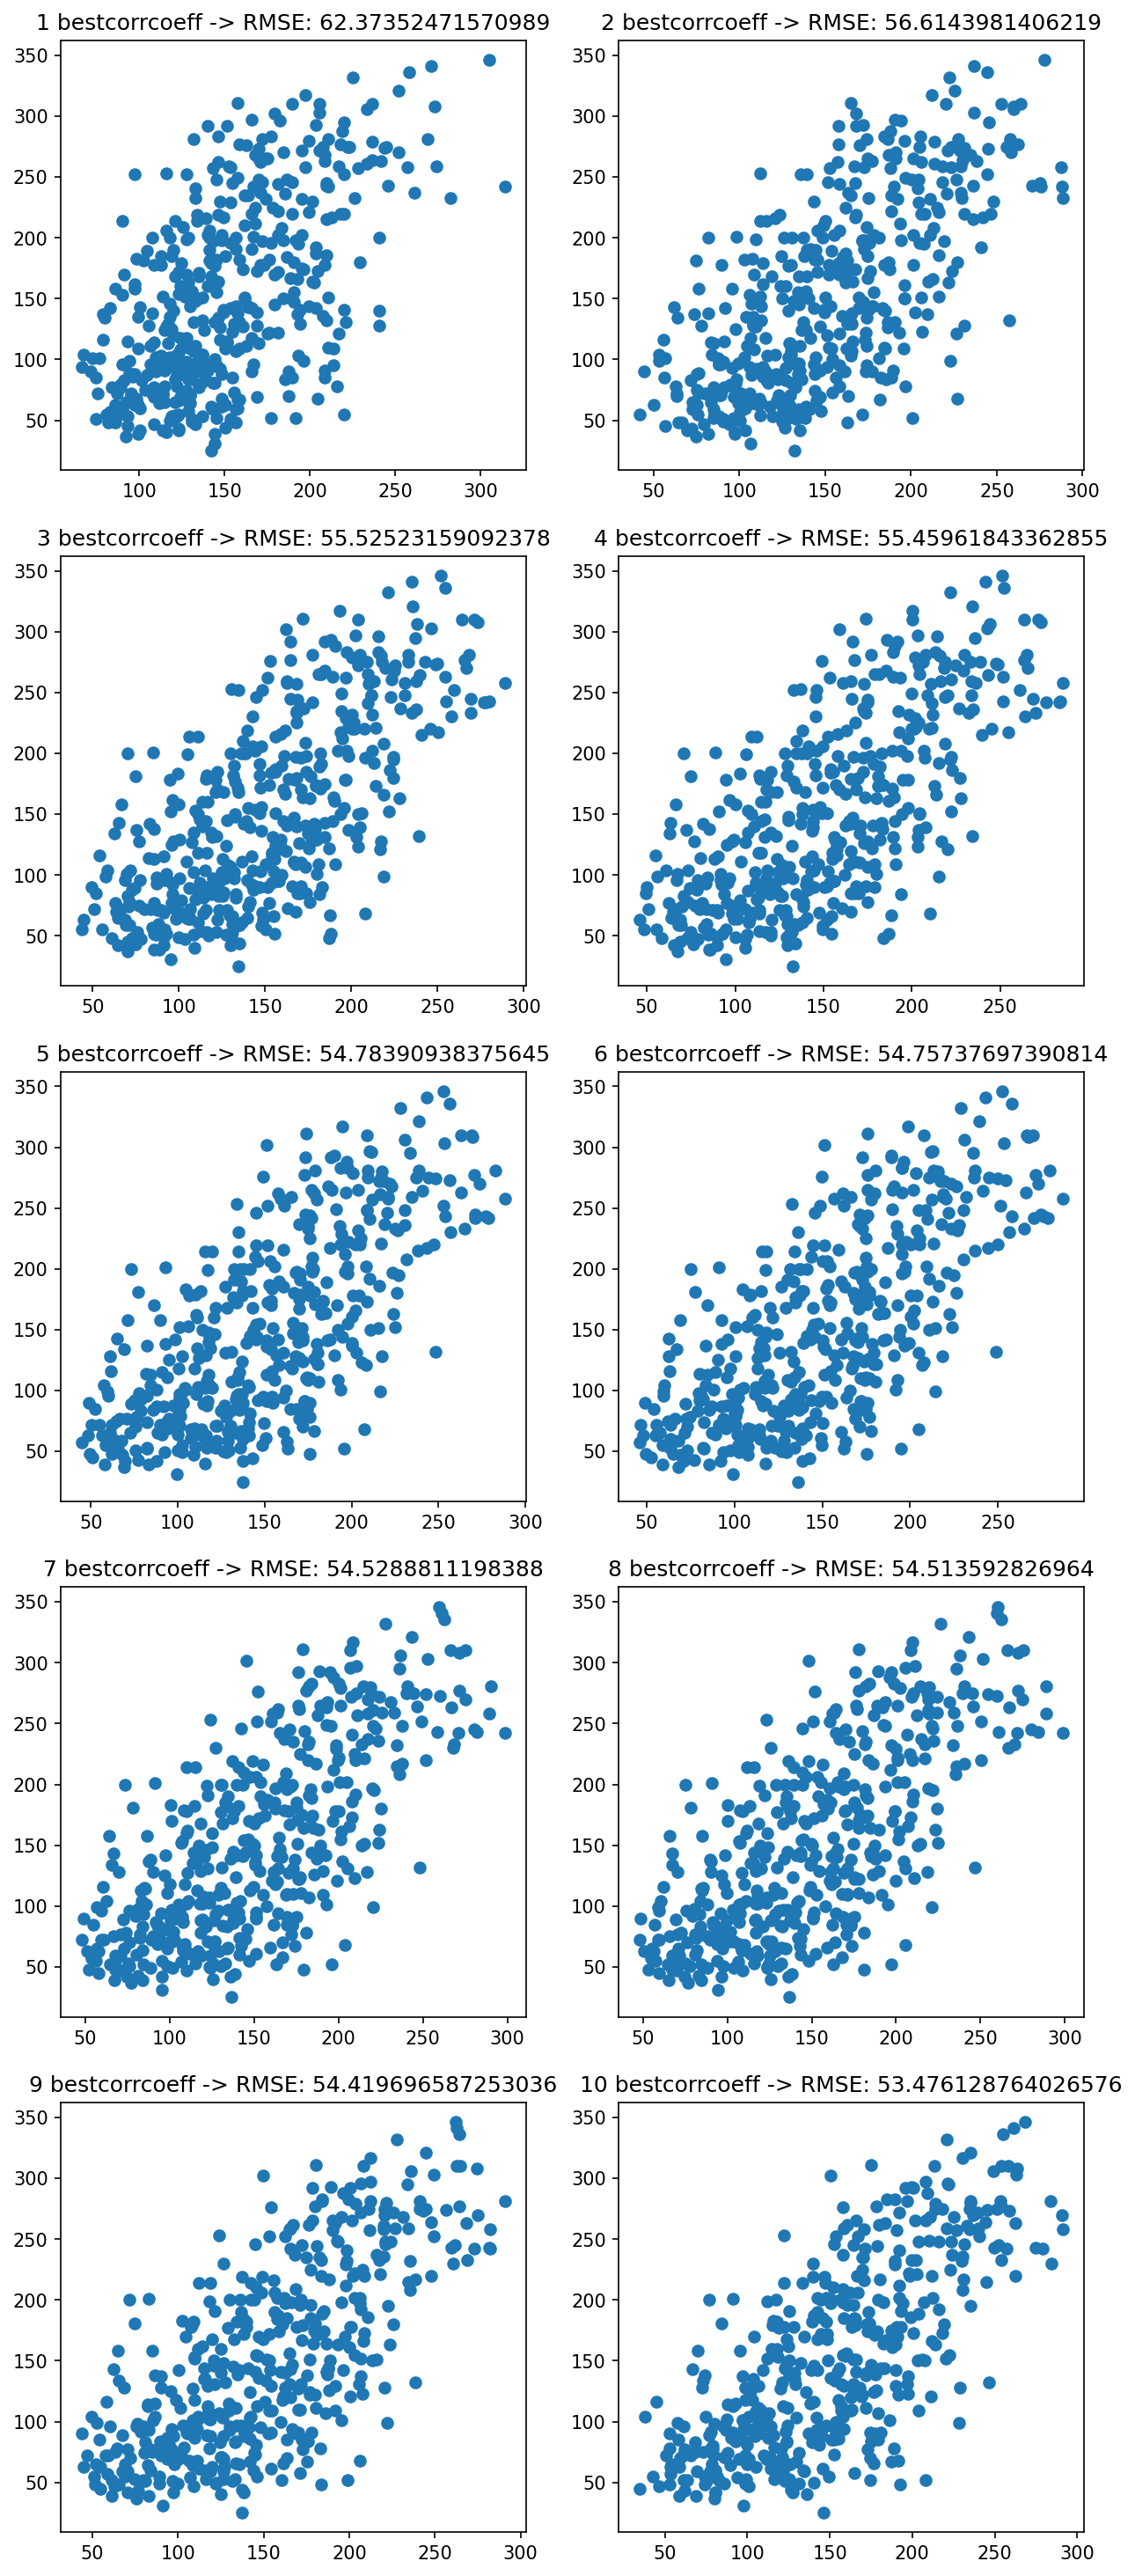

In [25]:
# 1.1.2  Multivariate Linear Regression
###################
# INSERT CODE HERE
###################

plt.figure(figsize=(10,25), dpi=150)

for i in range (1,len(t_names)+1):
    linreg = MyLinearRegressor()
    best_indices = most_corr[-i:]
    xx = X[:,best_indices]
    predict = linreg.fit_predict(xx,t)
    
    plt.subplot(5,2,i)
    plt.scatter(predict,t)
    plt.title(f'{i} bestcorrcoeff -> RMSE: {compute_rmse(predict,t)}')
plt.show()

Text(0.5, 1.0, '(X2, t2) \n 3 best corrcoeff -> RMSE: 58.67457901371539')

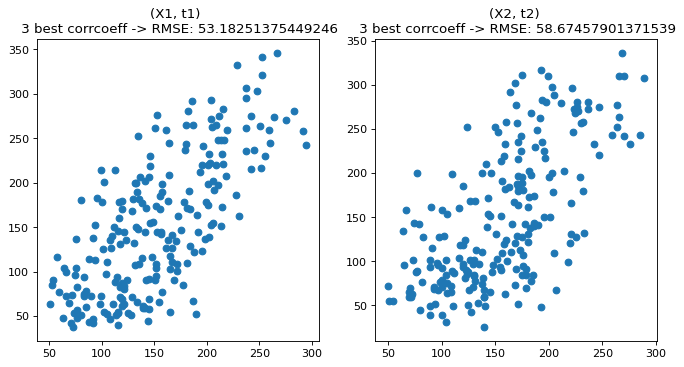

In [26]:
# 1.1.3  Train-test Generalization
X_copy = X.copy()
t_copy = t.copy()

def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

X_perm, t_perm = unison_shuffled_copies(X_copy, t_copy)
half_index = X_perm.shape[0]//2

X1 = X_perm[:half_index, :]
X2 = X_perm[half_index:, :]

t1 = t_perm[:half_index, :]
t2 = t_perm[half_index:, :]

linreg = MyLinearRegressor()
i = 3
best_indices = most_corr[-i:]

xx1 = X1[:, best_indices]
xx2 = X2[:, best_indices]

linreg.fit(xx1, t1)

plt.figure(figsize=(10, 5), dpi=80)


plt.subplot(1,2,1)
predict_X1 = linreg.predict(xx1)
plt.scatter(predict_X1, t1)
plt.title(f'(X1, t1) \n {i} best corrcoeff -> RMSE: {compute_rmse(predict_X1, t1)}')


plt.subplot(1,2,2)
predict_X2 = linreg.predict(xx2)
plt.scatter(predict_X2, t2)
plt.title(f'(X2, t2) \n {i} best corrcoeff -> RMSE: {compute_rmse(predict_X2, t2)}')




In [27]:
# 1.1.4 Stochastic Gradient Descent

class MySGDLinearRegressor(MyLinearRegressor):
    def __init__(self, n_epochs=100, lr=1e-3, lr_annealing=0.99, **kwargs):
        super().__init__(**kwargs)
        self.n_epochs = n_epochs
        self.lr = lr
        self.lr_annealing = lr_annealing
        
    def fit(self, X, y):
        assert X.shape[-1] == 2, "Only 2 features are supported for now"
        if len(y.shape) < 2:
            y = np.expand_dims(y, axis=-1)
        
        w0 = 1
        w1 = 100
        b  = -10
        lr = self.lr
        ## Compute coeffs
        for epoch in range(self.n_epochs):
            for x, ytrue in zip(X, y):
                # Compute Gradient
                ypred = w0*x[0]+w1*x[1]+b
                dLdypred = 2*(ypred-ytrue)
                dLdb = dLdbeta=dLdypred
                dLdwo = dLdbeta*x[0]
                dLdw1 = dLdbeta*x[1]

                # Update weights
                w0 = w0 -lr*dLdwo
                w1 = w1 - lr*dLdw1
                b = b - lr*dLdb

                # Update lr (learning rate)
                lr = lr*self.lr_annealing/(lr+self.lr_annealing)


        self.coeffs = np.array([w0, w1])
        self.bias = b[0]
        return self
best_indices = most_corr[-2:]
xx = X[:, best_indices]

linreg = MyLinearRegressor()
sgdlinreg = MySGDLinearRegressor(n_epochs=100, lr=1e-3, lr_annealing=0.9)

real_score = linreg.fit(xx, t).score(xx, t)
sgd_score = sgdlinreg.fit(xx, t).score(xx, t)

print(f"Pseudo-inverse method: {real_score:5.2f} (coeffs: {linreg.coeffs[0]}, bias={linreg.bias})")
print(f"SGD method:            {sgd_score:5.2f} (coeffs: {sgdlinreg.coeffs}, bias={sgdlinreg.bias})")

Pseudo-inverse method: 56.61 (coeffs: [56.05638703], bias=-299.9575150802325)
SGD method:            64.07 (coeffs: [[9.65710156]
 [5.08481356]], bias=-30.135768542445934)


# Radial Basis Function Network


In [28]:
data_file = "data/bell_shaped.mat"
# data_file = "data/wave_shaped.mat"

df = scipy.io.loadmat(data_file)
x_train = df['X_train']
x_test = df['X_test']
t_train = df['T_train']
t_test = df['T_test']

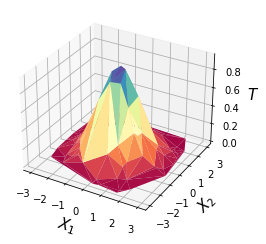

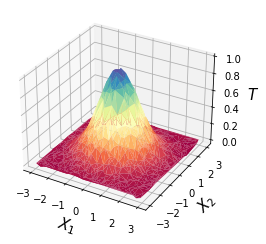

In [29]:
visualize(x_train,t_train)
visualize(x_test,t_test)

In [30]:
#put your code of competitive learning here
def comp_learning(X: np.ndarray, Y: np.ndarray, n_epochs: int = 100, alpha: float = 0.1, beta: float = 0.99, min_epsilon: float = 1e-3):
    """ Computes and returns the centroids updated via the competitive learning algorithm
        
        Args:
            X: a matrix of shape PxD representing the data-points
            Y: a matrix of shape QxD representing the centroids' initilization
            n_epochs: the maximum number of epochs before stopping the algorithm
            alpha: the learning rate
            beta: the learning rate annealing rate
            min_epsilon: the minimal stopping criterion
        
        Returns:
            Y: a matrix of shape QxD containing the new centroid
            epoch: the number of epochs before returning (is always <= n_epochs)
    """
    assert len(X.shape)==2 and len(Y.shape)==2, f"Expected X and Y to both be 2D matrices but instead got {X.shape} and {Y.shape}"
    for epoch in range(n_epochs):
        prev_Y = Y.copy()
        
        # Shuffle Data
        np.random.shuffle(np.copy(X))
        
        # Use up every data point
        for xp in X:
            #closest centroid
            index = np.argmin(np.sum(xp-Y),axis=-1)
            #update closest centroid
            yq = Y[index,:]
            Y[index,:]=yq + alpha * (xp - yq)

        # Update Learning Rate
        alpha = alpha*beta / (alpha+beta)
        
        # 'Intelligent' stopping criterion
        if np.mean(np.abs(prev_Y-Y)) < min_epsilon:
            print(f"Stopped at epoch {epoch}")
            break

    return Y, epoch+1

# Centroid Initialization
def get_inits(X, Q, method = "sample"):
    inits = {}
    mini = np.min(X, axis=0)
    maxi = np.max(X, axis=0)
    
    n_feats = X.shape[-1]
    rand_array = []
    for i in range(n_feats):
        rand_array.append(
            np.random.uniform(mini[i],maxi[i],Q)
        )
    inits["random"] = np.array(rand_array).T
    inits["sample"] = np.array(random.sample(X.tolist(), Q))

    return inits[method]

In [31]:
class MyRBFN():
    def __init__(self, nb_centers, width_scaling):
        super().__init__()
        self.nb_centers = nb_centers
        self.width_scaling = width_scaling

        self.linear_model = MyLinearRegressor(add_bias = True)
        
    def fit_centers(self,X):
        centroid_inits = get_inits(X,self.nb_centers)
        # c is of shape (nb_centers,X.shape[1])
        self.c, self.i = comp_learning(X, centroid_inits, n_epochs=100, alpha=0.1, beta=0.99, min_epsilon=1e-3)
    
    def fit_widths(self,X):
        ###################
        # INSERT CODE HERE
        ###################
        distances = np.sqrt(np.sum((np.repeat(X,self.nb_centers,axis=0).reshape(X.shape[0],self.nb_centers,2)-self.c)**2,axis=-1))
        closest_center = np.argmin(distances,axis=-1)
        self.s=[]
        for center in range(self.nb_centers):
            center_samples = np.where(closest_center == center)
            self.s.append(np.mean(distances[center_samples,center]))
        self.s = np.array(self.s) * self.width_scaling
        print(self.s.shape)
        
    def fit_weights(self,X,y):
        ###################
        # INSERT CODE HERE
        ###################
        self.linear_model.fit(self.non_linear_transform(X),y)
        
    def fit(self, X, y):
        self.fit_centers(X)
        self.fit_widths(X)
        self.fit_weights(X,y)
    
    def non_linear_transform(self,X):
        ###################
        # INSERT CODE HERE
        ###################
        out = np.ndarray((X.shape[0],self.nb_centers))
        for i in range(self.nb_centers):
            out[:,i] = np.exp(- 1./2.* np.sum((X-self.c[i])**2,axis=1))/(self.s[i]**2+1e-14)
        return out
    
    def predict(self, X):
        ###################
        # INSERT CODE HERE
        ###################
        return self.linear_model.predict(self.non_linear_transform(X))
    
    def fit_predict(self, X, y):
        return self.fit(X, y).predict(X)
    
    def score(self, X, y_true):
        y = self.predict(X)
        return compute_rmse(y, y_true)

In [32]:
rbfn = MyRBFN(nb_centers =40, width_scaling = 4.)
rbfn.fit(x_train,t_train)

Stopped at epoch 1
(40,)


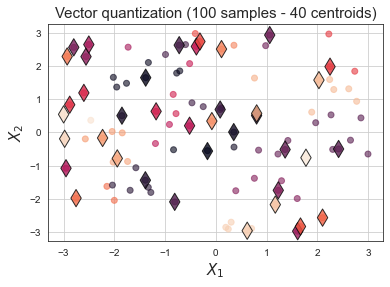

In [33]:
# Try this after you implemented fit_centers() 
show_quantization(x_train,rbfn.c)

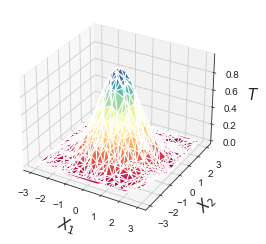

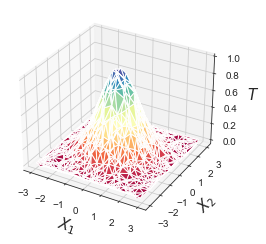

0.018899789488012173

In [34]:
visualize(x_test,rbfn.predict(x_test))
visualize(x_test,t_test)
rbfn.score(x_test,t_test)